CCTV, 인구수 데이터를 이용해 다른 분석을 해볼 것

1. 가설
2. 가설 검증을 위한 데이터 전처리
3. 가설을 시각화
4. 가설 평가
5. 비즈니스 적용 방안

# 인구수 대비 CCTV 비율과 고령자 비율의 상관관계
가설 :  고령자 비율이 높은 지역구는 인구수 대비 CCTV 비율이 높다.<br>
-> 가설검증을 위한 데이터 전처리

In [1]:
import pandas as pd
import numpy as np

In [2]:
CCTV_Seoul = pd.read_csv('./data/CCTV_preprocessing.csv', encoding='utf-8')
pop_Seoul = pd.read_csv('./data/pop_preprocessing.csv', encoding='UTF-8')

In [3]:
CCTV_Seoul = CCTV_Seoul[CCTV_Seoul.columns[1:]]
pop_Seoul = pop_Seoul[pop_Seoul.columns[1:]]

In [4]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [5]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
1,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
2,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
3,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
4,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


CCTV, 인구 데이터 프레임을 합친다.

In [6]:
data_result = pd.merge(CCTV_Seoul,pop_Seoul,on='구별')
data_result

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
5,광진구,707,573,78,53,174,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
6,구로구,1561,1142,173,246,323,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
7,금천구,1015,674,51,269,354,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
8,노원구,1265,542,57,451,516,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
9,도봉구,485,238,159,42,386,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507


In [7]:
# del 키워드로 필요없는 colunm 정리
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
#del data_result['외국인']
#del data_result['외국인비율']
del data_result['한국인']
data_result.head()

,구별,소계,최근증가율,인구수,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,18312.0,68082.0,3.484582,12.955291


인구수 대비 CCTV 비율을 추가한다

In [8]:
data_result["CCTV비율"] = data_result['소계']/data_result['인구수']*100

구별을 대표 인덱스로 설정

In [9]:
data_result.set_index('구별',inplace=True)
data_result.head()

,소계,최근증가율,인구수,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,4950.0,63167.0,0.867660,11.072217,0.487292
강동구,773,166.490765,453233.0,4214.0,54622.0,0.929765,12.051638,0.170552
강북구,748,125.203252,330192.0,3506.0,54813.0,1.061806,16.600342,0.226535
강서구,884,134.793814,603772.0,6524.0,72548.0,1.080540,12.015794,0.146413
관악구,1496,149.290780,525515.0,18312.0,68082.0,3.484582,12.955291,0.284673


### 고령자 비율과 CCTV비율의 피어슨 상관계수 구하기

In [23]:
np.corrcoef(data_result['고령자비율'],data_result['CCTV비율'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [21]:
# cf - 외국인 비율과 CCTV 비율
np.corrcoef(data_result['외국인비율'],data_result['CCTV비율'])

array([[1.        , 0.40619872],
       [0.40619872, 1.        ]])

In [12]:
# 고령자 비율이 높은 순서로 정렬
data_result.sort_values(by='고령자비율', ascending=False).head()

,소계,최근증가율,인구수,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,
강북구,748,125.203252,330192.0,3506.0,54813.0,1.061806,16.600342,0.226535
종로구,1002,248.922414,162820.0,9231.0,25425.0,5.669451,15.615404,0.615404
중구,671,147.699758,133240.0,8928.0,20764.0,6.700690,15.583909,0.503603
용산구,1624,53.216374,244203.0,14747.0,36231.0,6.038828,14.836427,0.665020
서대문구,962,48.578199,327163.0,12181.0,48161.0,3.723221,14.720797,0.294043


## 시각화 진행

In [13]:
import platform #os 정보를 가져 올 수 있는 모듈

from matplotlib import font_manager, rc # font_manager : 폰트 관리 모듈, rc : 폰트 변경 모듈
from matplotlib import pyplot as plt # 시각화 도구
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False # 유니코드 표현 설정하기


if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # OS가 APPLE(Darwin)이면 AppleGothic으로 폰트 설정
elif platform.system() == 'Windows':
    path="c:/Windows/Fonts/malgun.ttf" #OS가 윈도우즈면 맑은 고딕으로 설정
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown System... sorry~~~~')

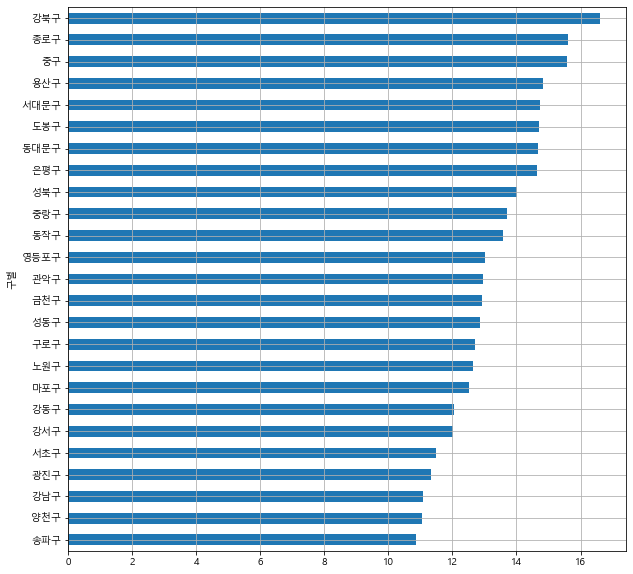

In [14]:
data_result['고령자비율'].sort_values().plot(kind="barh",grid=True,figsize=(10,10))
plt.show()

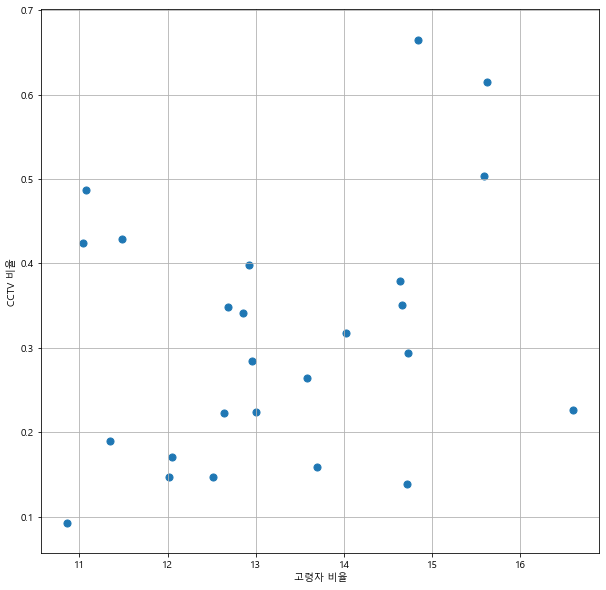

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['고령자비율'],data_result['CCTV비율'],s=50)
plt.xlabel('고령자 비율')
plt.ylabel('CCTV 비율')
plt.grid()
plt.show()

In [16]:
fp1 = np.polyfit(data_result['고령자비율'],data_result['CCTV비율'],1)
fp1

array([ 0.02750778, -0.05266182])

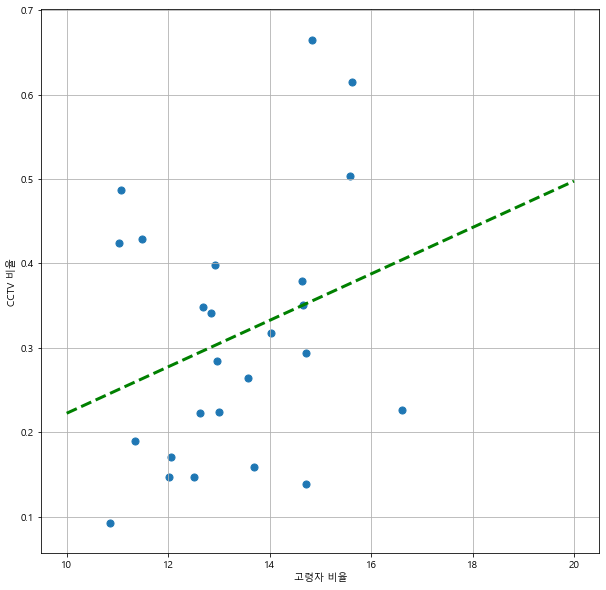

In [17]:
f1 = np.poly1d(fp1) # fp1의 정보를 이용해서(기울기, 절편), 1차 함수(1d) 수식을 만들어낸다.

# 함수에 들어갈 값
# 고령자 비율은 10 이상 20 이하라고 가정한다.
fx = np.linspace(10,20,500)

plt.figure(figsize=(10,10))
plt.scatter(data_result['고령자비율'],data_result['CCTV비율'],s=50)

# 상관 계수를 활용한 직선 긋기
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')
plt.xlabel('고령자 비율')
plt.ylabel('CCTV 비율')
plt.grid()
plt.show()

고령자 비율이 대략 14.3%정도 되면 인구수 당 CCTV의 비율은 0.35%정도가 적당하다.
* 직선보다 위에 있으면 고령자 비율에 비해 인구수 당 CCTV가 많이 설치된 것
* 직선보다 아래에 있으면 고령자 비율에 비해 인구수 당 CCTV가 적게 설치된 것

**비즈니스 적용 방안**<br>
고령자 비율이 높은데도 불구하고, 인구수 당 CCTV의 비율이 낮다면, 그 지역구에 CCTV를 더 설치해도 무리가 없다.